In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np


data = pd.read_csv('countries.csv')
countries = pd.read_csv('countries.csv')

In [5]:
data.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [6]:
data_2007 = data[data.year == 2007]

In [7]:
data_2007.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
11,Afghanistan,Asia,2007,43.828,31889923,974.580338
23,Albania,Europe,2007,76.423,3600523,5937.029526
35,Algeria,Africa,2007,72.301,33333216,6223.367465
47,Angola,Africa,2007,42.731,12420476,4797.231267
59,Argentina,Americas,2007,75.320,40301927,12779.379640


In [11]:
top10 = data_2007.sort_values('population', ascending=False).head(10)

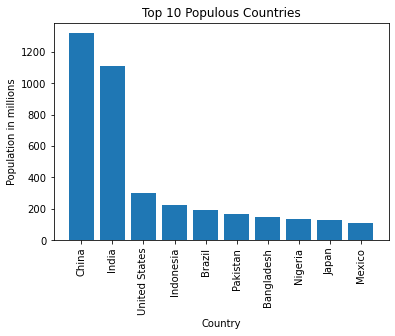

In [19]:
x = range(10)
plt.bar(x, top10.population / 10**6)
plt.xticks(x, top10.country, rotation='vertical')
plt.xlabel('Country')
plt.ylabel('Population in millions')
plt.title('Top 10 Populous Countries')
plt.show()

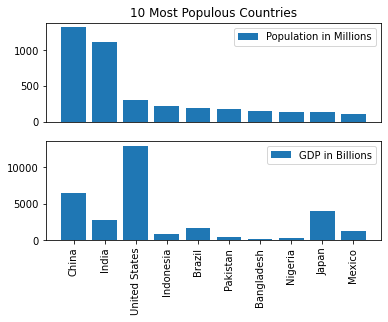

In [37]:
plt.subplot(2,1,1)
x = range(10)
plt.bar(x, top10.population / 10**6)
plt.xticks([],[])
plt.title('10 Most Populous Countries')
plt.legend(['Population in Millions'])

plt.subplot(2,1,2)
plt.bar(x, top10.population * top10.gdpPerCapita / 10**9)
plt.xticks(x,top10.country, rotation='vertical')
plt.legend(['GDP in Billions'])
plt.show()

In [6]:
us = countries[countries.country == 'United States']

ct_2007 = countries[countries.year == 2007]
ct_2007.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
11,Afghanistan,Asia,2007,43.828,31889923,974.580338
23,Albania,Europe,2007,76.423,3600523,5937.029526
35,Algeria,Africa,2007,72.301,33333216,6223.367465
47,Angola,Africa,2007,42.731,12420476,4797.231267
59,Argentina,Americas,2007,75.320,40301927,12779.379640


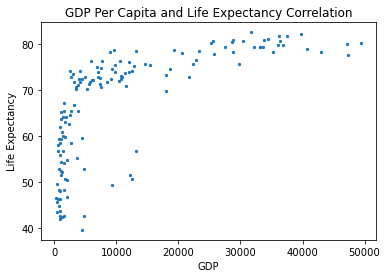

In [7]:
plt.scatter(ct_2007.gdpPerCapita, ct_2007.lifeExpectancy, 5)
plt.title('GDP Per Capita and Life Expectancy Correlation')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.show()

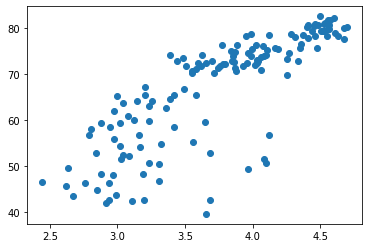

In [8]:
np.log10([10,100,1000])

plt.scatter(np.log10(ct_2007.gdpPerCapita),ct_2007.lifeExpectancy)
plt.show()

In [9]:
ct_2007.gdpPerCapita.corr(ct_2007.lifeExpectancy)

0.6786623986777586

In [10]:
np.log10(ct_2007.gdpPerCapita).corr(ct_2007.lifeExpectancy)

0.8089802514849211

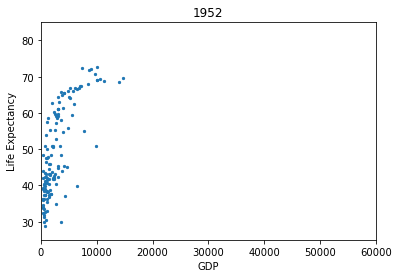

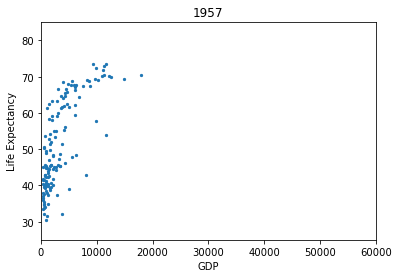

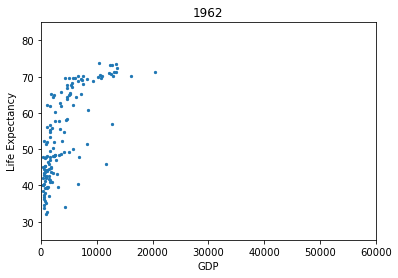

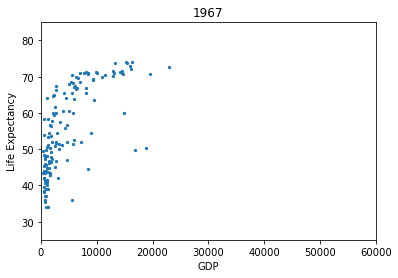

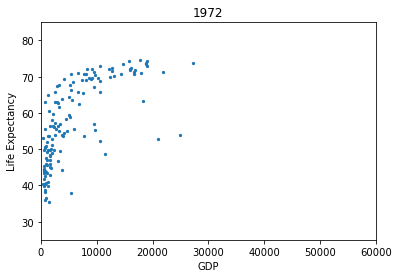

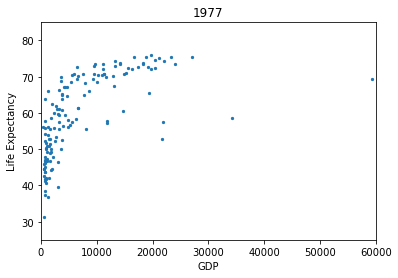

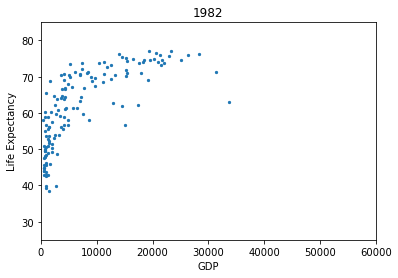

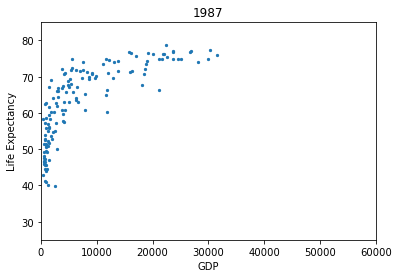

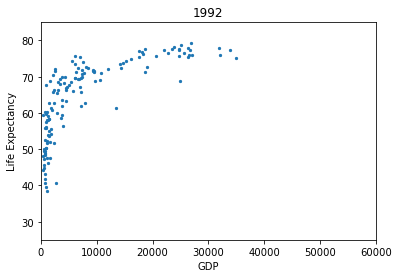

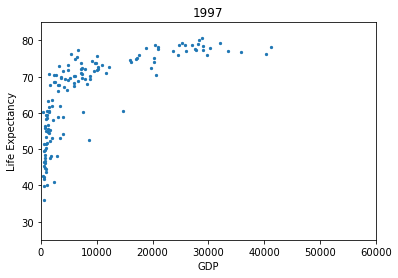

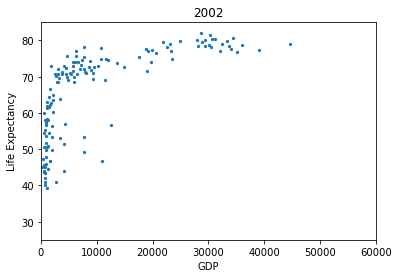

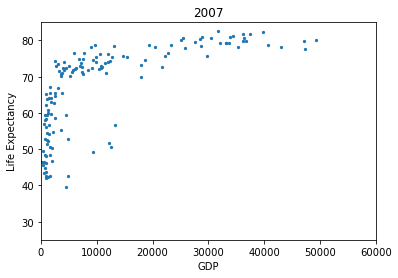

In [11]:
years_sorted = sorted(set(countries.year))

for given_year in years_sorted:
    countries_year = countries[countries.year == given_year]
    plt.scatter(countries_year.gdpPerCapita, countries_year.lifeExpectancy,5)
    plt.title(given_year)
    plt.xlim(0,60000)
    plt.ylim(25,85)
    plt.xlabel('GDP')
    plt.ylabel('Life Expectancy')
    plt.show()
    #plt.savefig(str(given_year), dpi=200) #dpi = dots per inch
    #plt.clf()

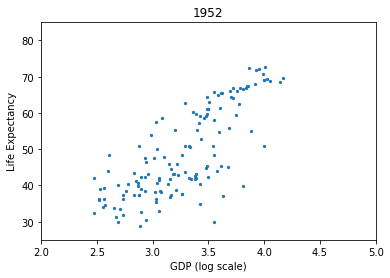

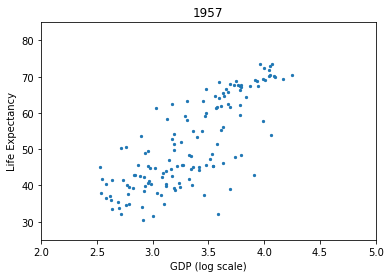

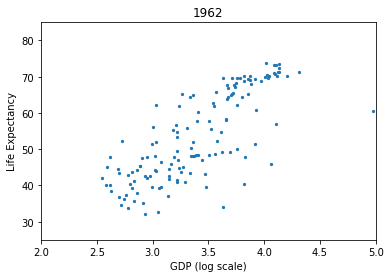

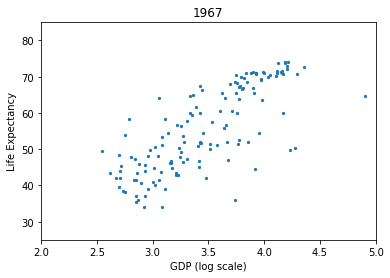

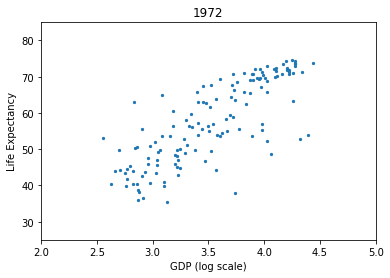

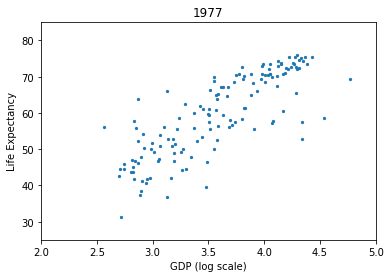

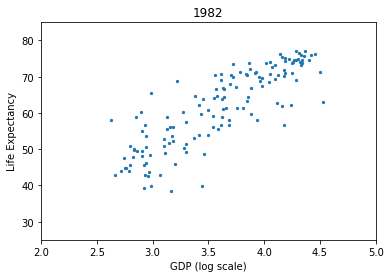

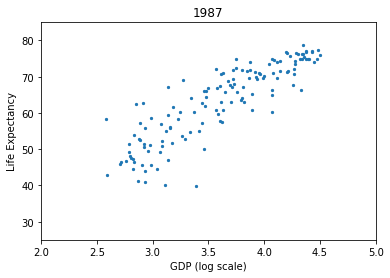

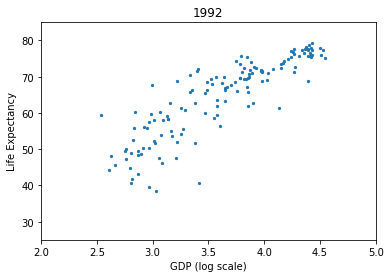

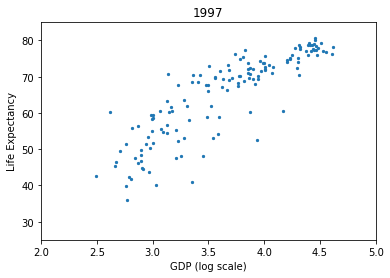

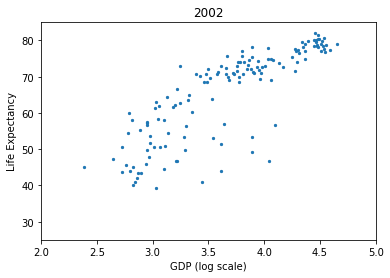

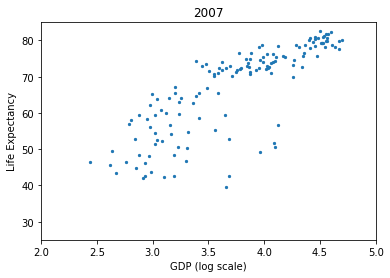

In [12]:
countries[countries.gdpPerCapita > 60000]

for given_year in years_sorted:
    countries_year = countries[countries.year == given_year]
    plt.scatter(np.log10(countries_year.gdpPerCapita), countries_year.lifeExpectancy,5)
    plt.title(given_year)
    plt.xlim(2, 5)
    plt.ylim(25,85)
    plt.xlabel('GDP (log scale)')
    plt.ylabel('Life Expectancy')
    plt.show()
    #plt.savefig(str(given_year), dpi=200) #dpi = dots per inch
    #plt.clf()

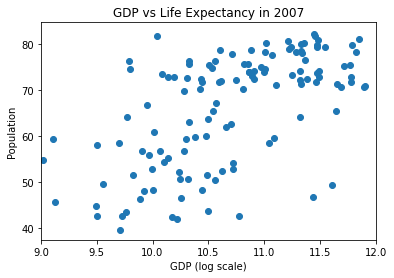

In [14]:
gdp_2007 = ct_2007.gdpPerCapita * ct_2007.population

plt.scatter(np.log10(gdp_2007), ct_2007.lifeExpectancy)
plt.xlabel('GDP (log scale)')
plt.ylabel('Population')
plt.title('GDP vs Life Expectancy in 2007')
plt.xlim(9,12)
plt.show()

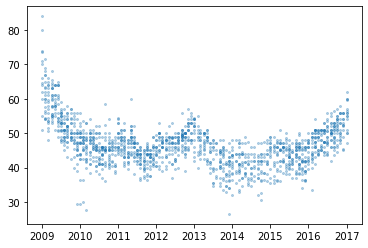

In [17]:
data1 = pd.read_csv(r'C:\Users\Chr041921\Downloads\Python Projects\08\obama.csv', parse_dates=['year_month'])

plt.plot(data1.year_month, data1.approve_percent, 'o', markersize=2,
        alpha=0.3)
plt.show()

In [18]:
data_mean = data1.groupby('year_month').mean()
data_median = data1.groupby('year_month').median()

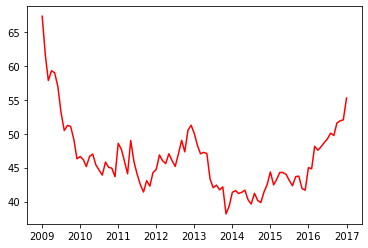

In [19]:
plt.plot(data_mean.index, data_mean.approve_percent, 'red')
plt.show()

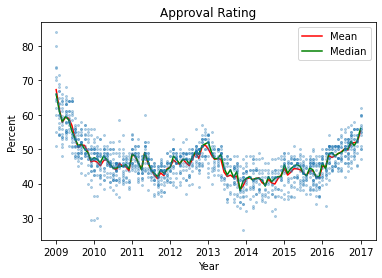

In [22]:
plt.plot(data_mean.index, data_mean.approve_percent, 'red')
plt.plot(data_median.index, data_median.approve_percent, 'green')
plt.plot(data1.year_month, data1.approve_percent, 'o', markersize=2,
        alpha=0.3)
plt.legend(['Mean', 'Median'])
plt.title('Approval Rating')
plt.xlabel('Year')
plt.ylabel('Percent')
plt.show()

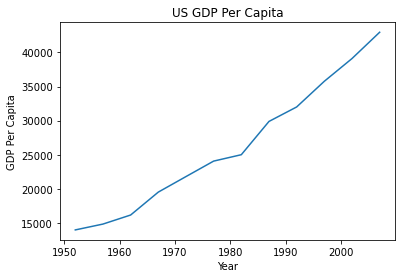

In [24]:
us = countries[countries.country == 'United States']
china = countries[countries.country == 'China']

plt.plot(us.year, us.gdpPerCapita)
plt.title('US GDP Per Capita')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.show()

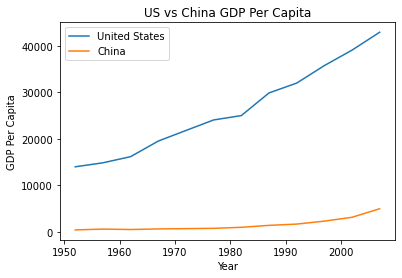

In [25]:
plt.plot(us.year, us.gdpPerCapita)
plt.plot(china.year, china.gdpPerCapita)
plt.title('US vs China GDP Per Capita')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.legend (['United States', 'China'])
plt.show()

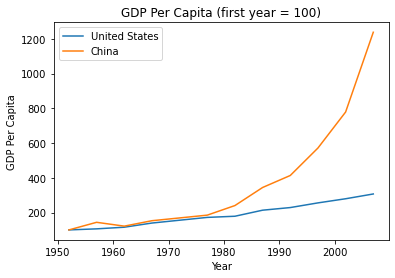

In [26]:
china_growth = china.gdpPerCapita / china.gdpPerCapita.iloc[0] * 100
us_growth = us.gdpPerCapita / us.gdpPerCapita.iloc[0] * 100 #this takes the us gdp and divides it by the very first gdp

plt.plot(us.year, us_growth)
plt.plot(china.year, china_growth)
plt.title('GDP Per Capita (first year = 100)')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.legend (['United States', 'China'])
plt.show()

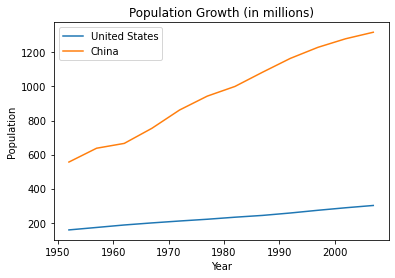

In [27]:
us_pop = us.population / us.population.iloc[0] *100
china_pop = china.population / china.population.iloc[0] * 100

plt.plot(us.year, us.population / 10**6)
plt.plot(china.year, china.population / 10**6)
plt.title('Population Growth (in millions)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend(['United States', 'China'])
plt.show()

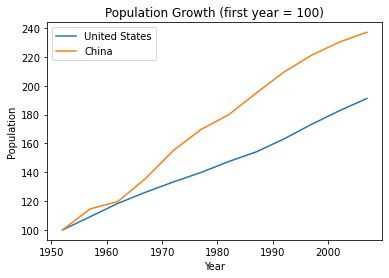

In [28]:
plt.plot(us.year, us_pop)
plt.plot(china.year, china_pop)
plt.title('Population Growth (first year = 100)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend(['United States', 'China'])
plt.show()